# Linear interpolation(LERP)

Text(1.5, 2, '$\\vec{v}_s$')

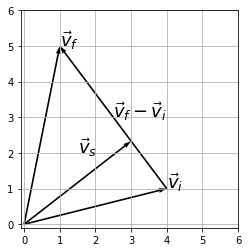

In [13]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal')
ax.set_xlim(xmin=-0.1,xmax=6)
ax.set_ylim(ymin=-0.1,ymax=6)
#ax.spines[['left', 'bottom']].set_position('center')
#for i in ax.get_xticklabels():
#    i.set_visible(True)
#    i.set_rotation(90)
#ax.set_xticks(np.arange(-5,6,1))
#ax.set_yticks(np.arange(-5,6,1))
ax.grid()
ax.quiver(0,0,4,1,scale=1,units='xy')
ax.text(4,1,r'$\vec{v}_i$',fontsize=18)
ax.quiver(0,0,1,5,scale=1,units='xy')
ax.text(1,5,r'$\vec{v}_f$',fontsize=18)
ax.quiver(4,1,1-4,5-1,scale=1,units='xy')
ax.text(2.5,3,r'$\vec{v}_f - \vec{v}_i$',fontsize=18)
# -4/3 x + 16/3 -> -16/3 = 1
# -4{x=3} + 19/3 = 0 -12/3 + 19/3 = 7/3
ax.quiver(0,0,3,7/3,scale=1,units='xy')
ax.text(1.5,2,r'$\vec{v}_s$',fontsize=18)
#ax.quiver(4,1,3-4,7/3-1,scale=1,units='xy',color='r')
#ax.text(3.5,2,r'$s(\vec{v}_f - \vec{v}_i)$',fontsize=18)

In [ ]:
import IPython as ipy
ipy.display.YouTubeVideo('https://www.youtube.com/watch?v=ibkT5ao8kGY&list=PLpzmRsG7u_gqaTo_vEseQ7U8KFvtiJY4K&index=14',width=800,height=640)

# LERP
> ### $
\vec{v}_s = \vec{v}_i + s(\vec{v}_f - \vec{v}_i) = (1-s)\vec{v}_i + s\vec{v}_f
$
>> ### Affine combination
>>> ### $1 - s + s = 1$

# Spherical Interpolation(SLERP)
> ### unit sphere
>> ### geodesic (측지선) - 두지점의 잇는 가장 짧은 곡면

Text(0.3153223623952687, 0.9489846193555862, '$v_f$')

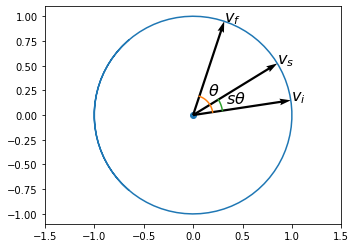

In [82]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal')
ax.set_xlim(xmin=-1.5,xmax=1.5)
x0 = np.linspace(-4,4,100)
x1 = np.linspace(0+0.15,1.25,100)
x2 = np.linspace(0+0.15,0.55,100)
ax.plot(np.cos(x0), np.sin(x0))
ax.plot(0.2*np.cos(x1), 0.2*np.sin(x1))
ax.plot(0.3*np.cos(x2), 0.3*np.sin(x2))
ax.scatter(0,0)
ax.quiver(0,0,np.cos(0.15),np.sin(0.15),scale=1,units='xy')
ax.quiver(0,0,np.cos(0.55),np.sin(0.55),scale=1,units='xy')
ax.quiver(0,0,np.cos(1.25),np.sin(1.25),scale=1,units='xy')
ax.text(0.15,0.2,r'$\theta$',fontsize=16)
ax.text(0.33,0.12,r'$s\theta$',fontsize=16)
ax.text(np.cos(0.15),np.sin(0.15),r'$v_i$',fontsize=16)
ax.text(np.cos(0.55),np.sin(0.55),r'$v_s$',fontsize=16)
ax.text(np.cos(1.25),np.sin(1.25),r'$v_f$',fontsize=16)

---
> ### 3D in same plane as $\hat{B} \iff 2D$
>> ### $
v_f = v_i R ,\quad R = e^{\theta\hat{B}}\; \ni \hat{B} =: (v_i \wedge v_f) \text{'s plane'} \\
v_f = R^{\dagger}v_i  ,\quad R^{\dagger} = e^{-\theta\hat{B}} \\
v_iR = R^{\dagger}v_i \because \text{ between a vector and Bivector in same plane,they will anticommute }
$
>> ### $
v_s = v_i e^{s\theta \hat{B}} = v_i{(e^{\theta\hat{B}})}^s = v_i(R)^s \\
\therefore R^s = e^{s\theta\hat{B}} \\
\therefore R^{s\dagger} = e^{-s\theta\hat{B}} \\
\therefore R^{\dagger\dagger} = R
$
> ### $
v_s = v_iR^s = R^{s\dagger}v_i \\
v_f = v_iR = R^{\dagger}v_i
$

---
# SLERP
> ### $
v_s = \alpha_s v_i + \beta_s v_f \because R = e^{\theta\hat{B}}, R^s = e^{s\theta\hat{B}} \\
v_iR^s = \alpha_sv_i + \beta_s v_iR \\
(v_iR^s) \wedge v_iR= (\alpha_sv_i + \beta_s v_iR) \wedge v_iR \\
\because viR^s \wedge v_iR = (v_iR^2v_iR - v_iRv_iR^s)/2 
\impliedby \text{the result of Rotation is a vector} \\
(v_iR^s) \wedge v_iR= (\alpha_sv_i + \beta_s v_iR) \wedge v_iR \\
= \frac{1}{2}(v_iR^sv_iR - v_iRv_iR^s)  = \frac{1}{2}\alpha_s\big( (v_i)^2R - v_iRv_i\big)\\
=  (v_iR^sv_iR - v_iRv_iR^s)  = \alpha_s\big( (v_i)^2R - v_iRv_i\big) \\
=  (v_i(R^sv_i)R - v_i(Rv_i)R^s)  = \alpha_s\big( (v_i)^2R - v_i(Rv_i)\big) \\
=  (v_iv_iR^{s\dagger}R - v_iv_iR^{\dagger}R^s)  = \alpha_s\big( (v_i)^2R - v_iv_iR^{\dagger})\big) \\
=  (v_i)^2R^{s\dagger}R - (v_i)^2R^{\dagger}R^s  = \alpha_s\big( (v_i)^2R - (v_i)^2R^{\dagger})\big)\\
\quad \because (v_i)^2 = |v_i|^2 = 1\\
=  R^{s\dagger}R - R^{\dagger}R^s  = \alpha_s\big(R - R^{\dagger})\big)\\
\quad \because (R_1R_2)^{\dagger} = (R_2)^{\dagger}(R_1)^{\dagger}, R^{\dagger\dagger} = R\\
=  R^{s\dagger}R - (R^{s\dagger}R^{\dagger\dagger})^{\dagger}  = \alpha_s\big(R - R^{\dagger})\big)\\
\quad \because R-R^{\dagger} = e^{\theta\hat{B}} - e^{-\theta\hat{B}} = cos\theta + sin(\theta)\hat{B} - ( cos(\theta) -sin(\theta)\hat{B}) = 2sin(\theta)\hat{B}) \\
=  R^{s\dagger}R - (R^{s\dagger}R)^{\dagger}  = 2\alpha_s \sin(\theta)\hat{B}\\
\quad \because R^{s\dagger}R = e^{-s\theta\hat{B}} e^{\theta\hat{B}} = e^{(1-s)\theta)\hat{B}} \\
= 2\sin\big((1-s)\theta\big)\hat{B} =   2\alpha_s \sin(\theta)\hat{B}\\
= \sin\big((1-s)\theta\big)\hat{B} =   \alpha_s \sin(\theta)\hat{B}\\
\therefore \alpha_s = \frac{\sin\big((1-s)\theta\big)\hat{B}}{\sin(\theta)\hat{B}} = \frac{\sin\big((1-s)\theta\big)}{\sin(\theta)}
$

---
> ### $v_iR^s = \alpha_sv_i + \beta_s v_iR $
> ### $v_i \wedge (v_iR^s) = v_i \wedge (\alpha_sv_i + \beta_s v_iR) $
> ### $\frac{1}{2}\big((v_i)^2R^s - v_iR^sv_i \big) = \frac{1}{2}\beta_s\big( (v_i)^2R - v_iRv_i\big)$
> ### $R^s - R^{s\dagger} = \beta_s(R-R^{\dagger})$
> ### $ \therefore \alpha_s = \frac{\sin\big(s\theta\big)\hat{B}}{\sin(\theta)\hat{B}} = \frac{\sin\big(s\theta\big)}{\sin(\theta)}$

# SLERP $\iff v_s = \frac{sin\big((1-s)\theta\big)}{sin(\theta)}v_i + \frac{sin(s\theta)}{sin(\theta)}v_f $
> ### $
\because \theta \approx sin(\theta) \\
v_s = \frac{(1-s)\theta}{\theta}v_i + \frac{s \theta}{\theta} = (1-s)v_i + sv_f \iff \text{ LERP}
$

# NLERP
> ### Nomal Linear intErPolation
>> ### $ v^{\star} = \frac{LERP}{|v|} = \frac{(1-s)v_i + sv_f}{|v|}$